# Introduction to LangGraph

In [1]:
#Here we create a series of functions 

def function1(input1):
    return input1+" From Function 1" 

def function2(input2):
    return input2+" From Function 2"

def function3(input3):
    return input3+" From Function 3"


In [2]:
#Executing the function 
function1("Visakh")

'Visakh From Function 1'

In [3]:
#Executing the function 
function2("Thanvi")

'Thanvi From Function 2'

In [4]:
#Executing the function 
function3("Tara")

'Tara From Function 3'

Performing Orchestration 

In [ ]:
#Importing Langgraph
from langgraph.graph import Graph

#Creating object of langgraph 
workflow1=Graph()

#Next is to add Nodes and Edges 
workflow1.add_node("fun1", function1)
workflow1.add_node("fun2", function2)
workflow1.add_node("fun3", function3)

#Next we create edges to connect between nodes 
workflow1.add_edge("fun1", "fun2")



We need to specify Entry and End Point

In [10]:
#Creating entry point 
workflow1.set_entry_point("fun1")

In [11]:
#Defining Finish Point
workflow1.set_finish_point("fun2")

In [12]:
#Next is to compine the workflow
app=workflow1.compile()

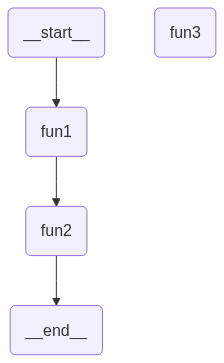

In [13]:
#Visualise the application 
from IPython.display import Image, display

#Display the app 
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
#Executig the application 
app.invoke("Hi, This is Thanvi")

'Hi, This is Thanvi From Function 1 From Function 2'

In [19]:
output1=app.stream("This is Thanvi and Tara")


In [20]:
# 1️⃣  Watch every step:
for event in output1:
    print(event)    

{'fun1': 'This is Thanvi and Tara From Function 1'}
{'fun2': 'This is Thanvi and Tara From Function 1 From Function 2'}


Visualising the outputs seperately from different nodes.

In [17]:
for output in app.stream("This is Thanvi and Tara"):
    for key, value in output.items():
        print(f"Here is the output from {key}")
        print("-------------")
        print(value)
        print(".....................")

Here is the output from fun1
-------------
This is Thanvi and Tara From Function 1
.....................
Here is the output from fun2
-------------
This is Thanvi and Tara From Function 1 From Function 2
.....................


## Integrating LLM call - Dummy

In [21]:
#Creating an Dummy LLM call()
def llm(input): 
    pass 

#Dummy token counter calculation ()  
def token_counter(input):
    pass 

In [ ]:
#Creating a workflo w
workflow2=Graph()

#Adding nodes 
workflow2.add_node("My_LLM", llm)
workflow2.add_node("LLM_Output_Token_Counter", token_counter)

#Adding edges
workflow2.add_edge("My_LLM", "LLM_Output_Token_Counter")

#Defining entry point 
workflow2.set_entry_point("My_LLM")

#Defining Finish Point 
workflow2.set_finish_point("LLM_Output_Token_Counter")

#Compiling and converting it to an app
app2=workflow2.compile() 


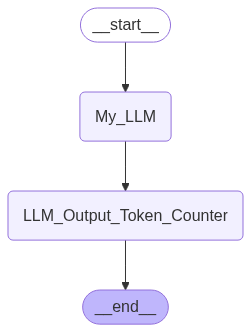

In [23]:
#Generating the graph 
display(Image(app2.get_graph().draw_mermaid_png()))

In [24]:
#exeucting the app2 
app2.invoke("Can you tell me about the capital of india? ")

## Integrating LLM calls

In [41]:
#Configuring LLM
#It will take the input and generte output using LLM 
def llm(input): 
    from langchain_google_genai import ChatGoogleGenerativeAI
    model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    output=model.invoke(input)
    return output 

#Token Counter Function 
#Takes the output of LLM and counts the number of tokens 
def token_counter(input):
    token=input.content.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"


In [42]:
#Create the workflow 
workflow2=Graph()

#Add nodes 
workflow2.add_node("My_LLM", llm)
workflow2.add_node("LLM_Token_Counter", token_counter)

#Adding Edges 
workflow2.add_edge("My_LLM", "LLM_Token_Counter") 

#Define the start or entry point
workflow2.set_entry_point("My_LLM")

#Define the end or finish point
workflow2.set_finish_point("LLM_Token_Counter")

#Compine and Create the app 
app2=workflow2.compile()




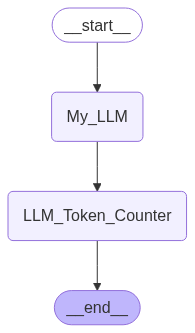

In [43]:
#Display the flow 
display(Image(app2.get_graph().draw_mermaid_png()))

In [44]:
#Run the workflow or app 
app2.invoke("Tell me something about Singapore")

'total token number in the generated answer is 64'

In [46]:
#Checking the step wise result in the workflow

for output in app2.stream("Tell me about Singapore"):
    print(output)

{'My_LLM': AIMessage(content="Singapore is a Southeast Asian island country and city-state located off the southern tip of the Malay Peninsula.  It's a remarkably unique place, boasting a fascinating blend of cultures, impressive infrastructure, and a highly developed economy.  Here's a glimpse into what makes Singapore special:\n\n**Key Features:**\n\n* **Highly Developed Economy:** Singapore is one of the world's wealthiest nations, with a highly competitive economy driven by trade, finance, tourism, and technology.  It's known for its efficient port, robust financial sector, and pro-business environment.\n* **Multicultural Society:** Despite its small size (728.6 square kilometers), Singapore is incredibly diverse, with significant populations of Chinese, Malay, Indian, and Eurasian people, creating a vibrant tapestry of cultures, languages, and religions.  This diversity is reflected in its food, architecture, and festivals.\n* **Cleanliness and Efficiency:** Singapore is renowned 

In [48]:

for output in app2.stream("Tell me about Singapore" ):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
content="Singapore is a small island nation located off the southern tip of the Malay Peninsula, in Southeast Asia.  It's incredibly diverse and fascinating, boasting a unique blend of cultures, cuisines, and modern infrastructure. Here's a glimpse into what makes Singapore special:\n\n**Key Aspects:**\n\n* **Highly Developed Economy:** Singapore is one of the world's most prosperous nations, known for its strategic location, highly skilled workforce, and business-friendly environment.  It's a major global hub for finance, trade, and shipping.\n\n* **Multicultural Society:**  While officially a multiracial society,  Chinese, Malay, Indian, and Eurasian communities coexist, creating a rich tapestry of traditions, languages, and religions. This is reflected in its food, festivals, and architecture.\n\n* **Modern Infrastructure:** Singapore is renowned for its cleanliness, efficiency, and state-of-the-art infrastructure.  Public transportation is excelle